# **Correlation analysis in realworld data**

In [ ]:
install.packages("mlbench")
install.packages("ggpubr")
install.packages("EnvStats")
install.packages("nortest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘nortest’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘cars’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
library(mlbench)
library(tidyverse)
library(ggpubr)
library(EnvStats)
library(nortest)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:EnvStats’:

    qqPlot


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [ ]:
install.packages("ggfortify")
library(ggfortify)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
download.file("https://drive.usercontent.google.com/uc?id=1hM2TMh-zqNljxHHi_LymzQZ0TjGQAnV6&authuser=0&export=download",
              tf <- tempfile())
bp<-readRDS(tf)

In [ ]:
glimpse(bp)

Rows: 500
Columns: 2
$ age <dbl> 64, 44, 54, 56, 54, 49, 65, 49, 70, 49, 63, 73, 36, 47, 49, 56, 47…
$ sbp <dbl> 159, 143, 150, 149, 144, 142, 153, 135, 152, 147, 150, 155, 141, 1…


**Data dictionary**

| Column Name  | Description | Data Type |
|--------------|-------------|-----------|
| age          | Age in years | Numeric |
| sbp     | Resting blood pressure (in mm Hg) | Numeric |

In this example, we will identify the association between age (x) and resting blood pressure (y) using simple linear regression.

**Check class of variables**

In [ ]:
class(bp$age); class(bp$sbp)

[1] "numeric"

[1] "numeric"

**Visualization**

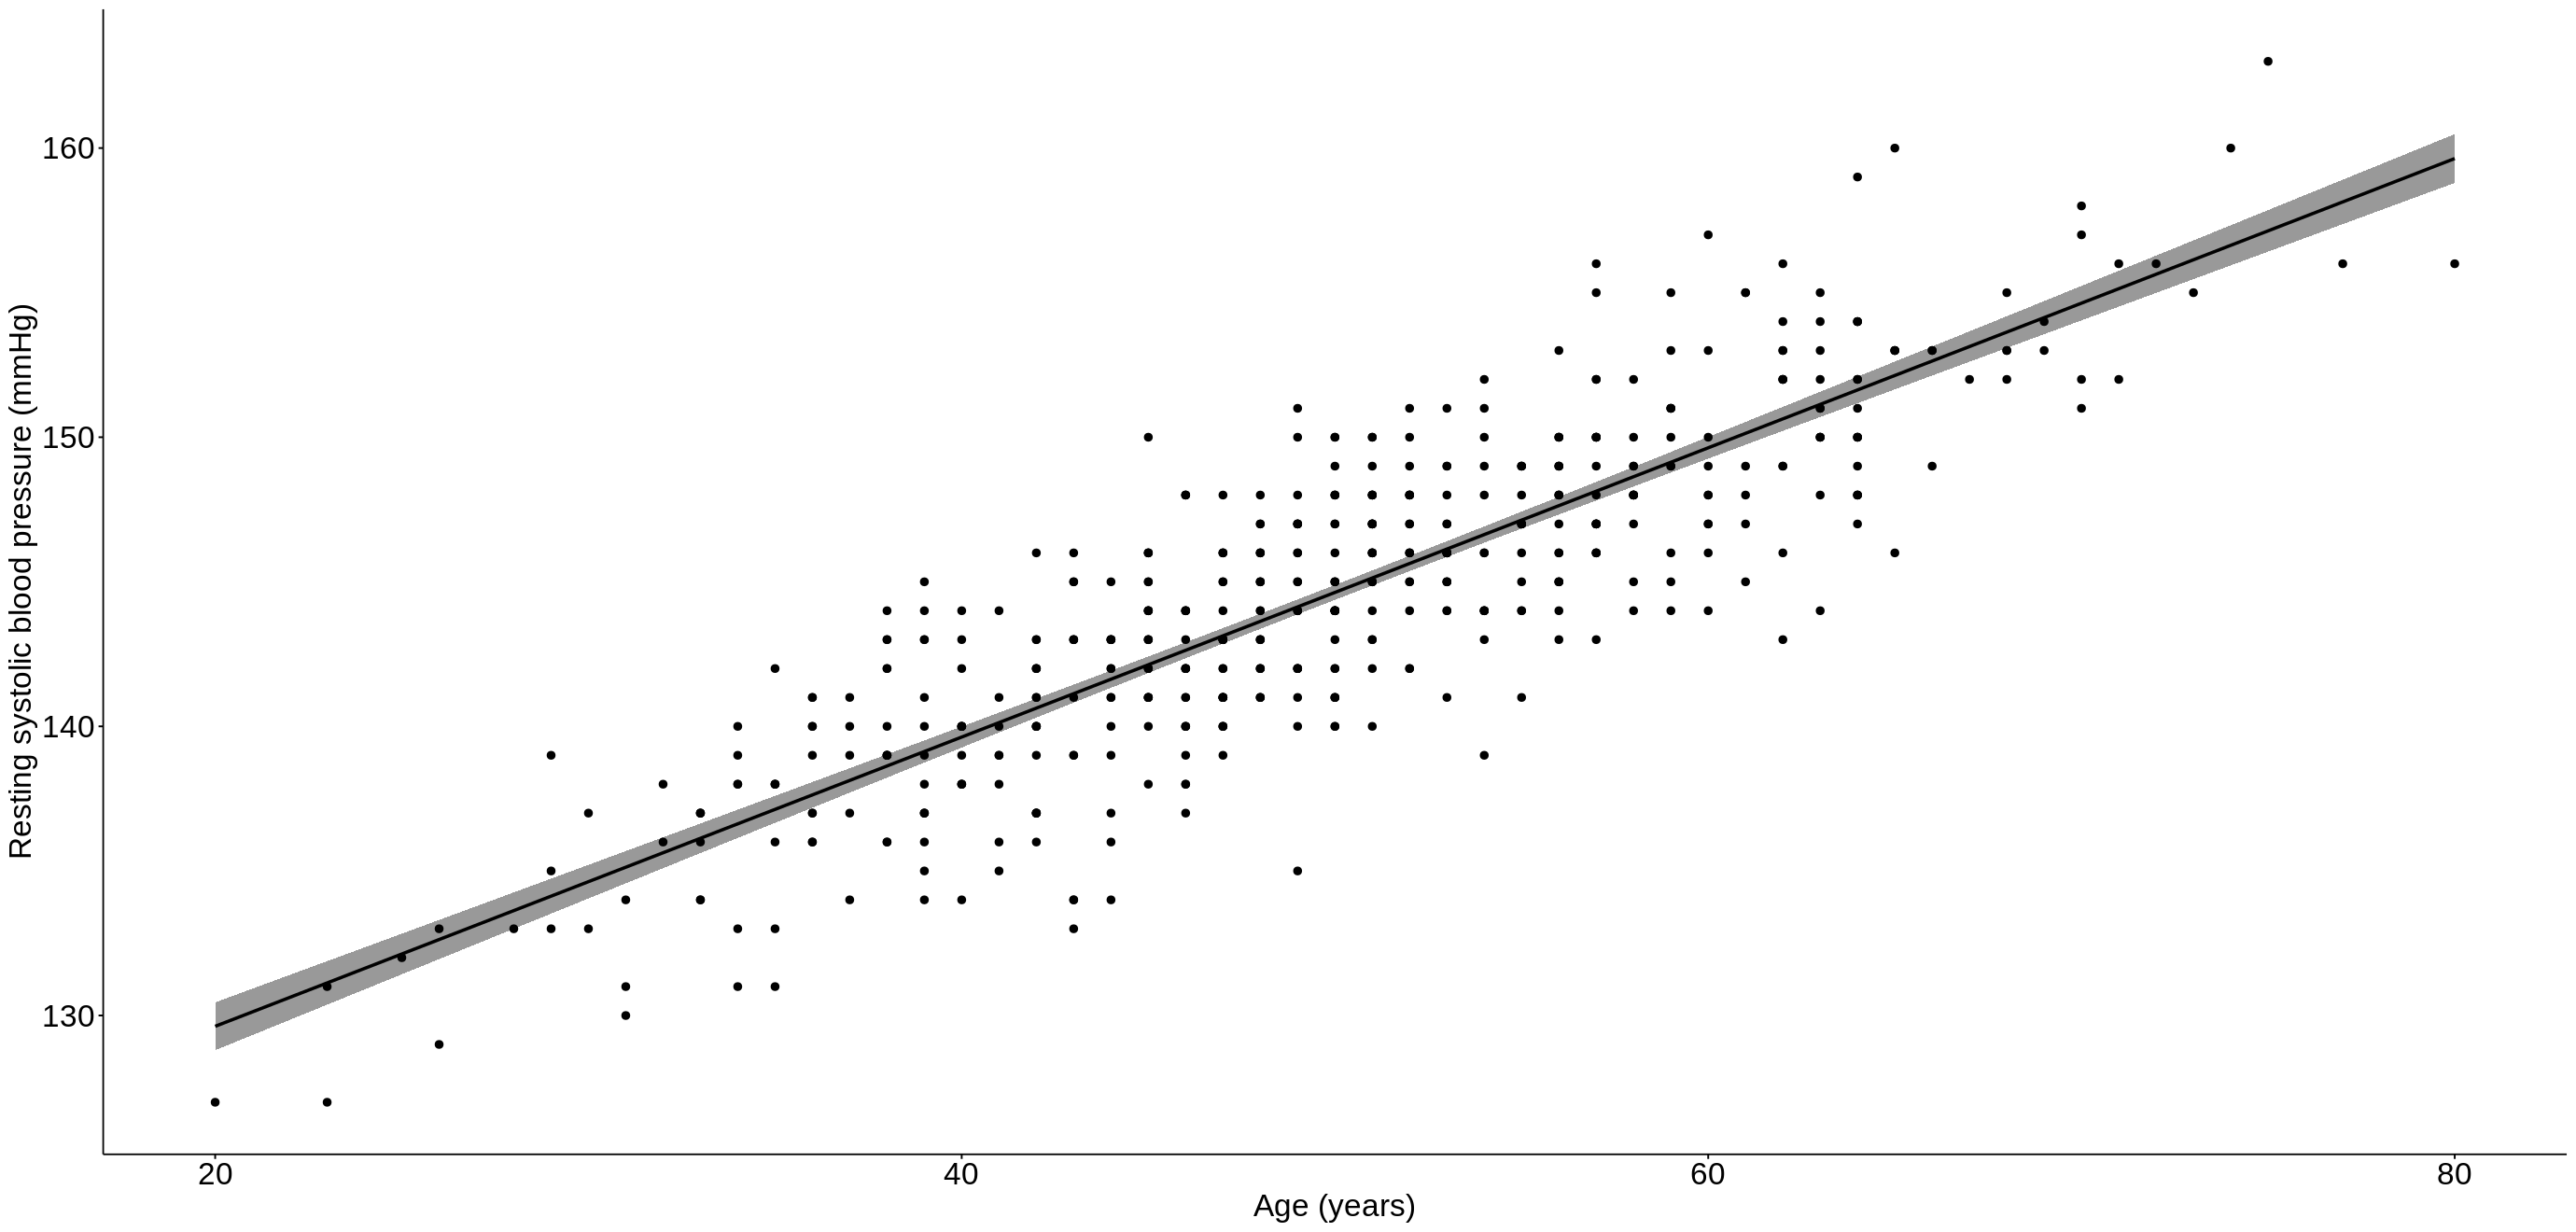

In [ ]:
options(repr.plot.width=23, repr.plot.height=11)
ggscatter(bp, x = "age", y = "sbp",
          add = "reg.line", conf.int = TRUE,
          xlab = "Age (years)", ylab = "Resting systolic blood pressure (mmHg)")+
            theme(text = element_text(size = 20))

It doesn't have linear trend. Roughly, r is around zero. (nearly horizontal)

**Check normality assumtion**

In [ ]:
shapiro.test(bp$age)


	Shapiro-Wilk normality test

data:  bp$age
W = 0.99775, p-value = 0.7497


P value < 0.05, **Thus age is normally distributed.**

In [ ]:
shapiro.test(bp$sbp)


	Shapiro-Wilk normality test

data:  bp$sbp
W = 0.99578, p-value = 0.1993


P value < 0.05, **Thus SBP is normally distributed.**

**Check for the outlier**

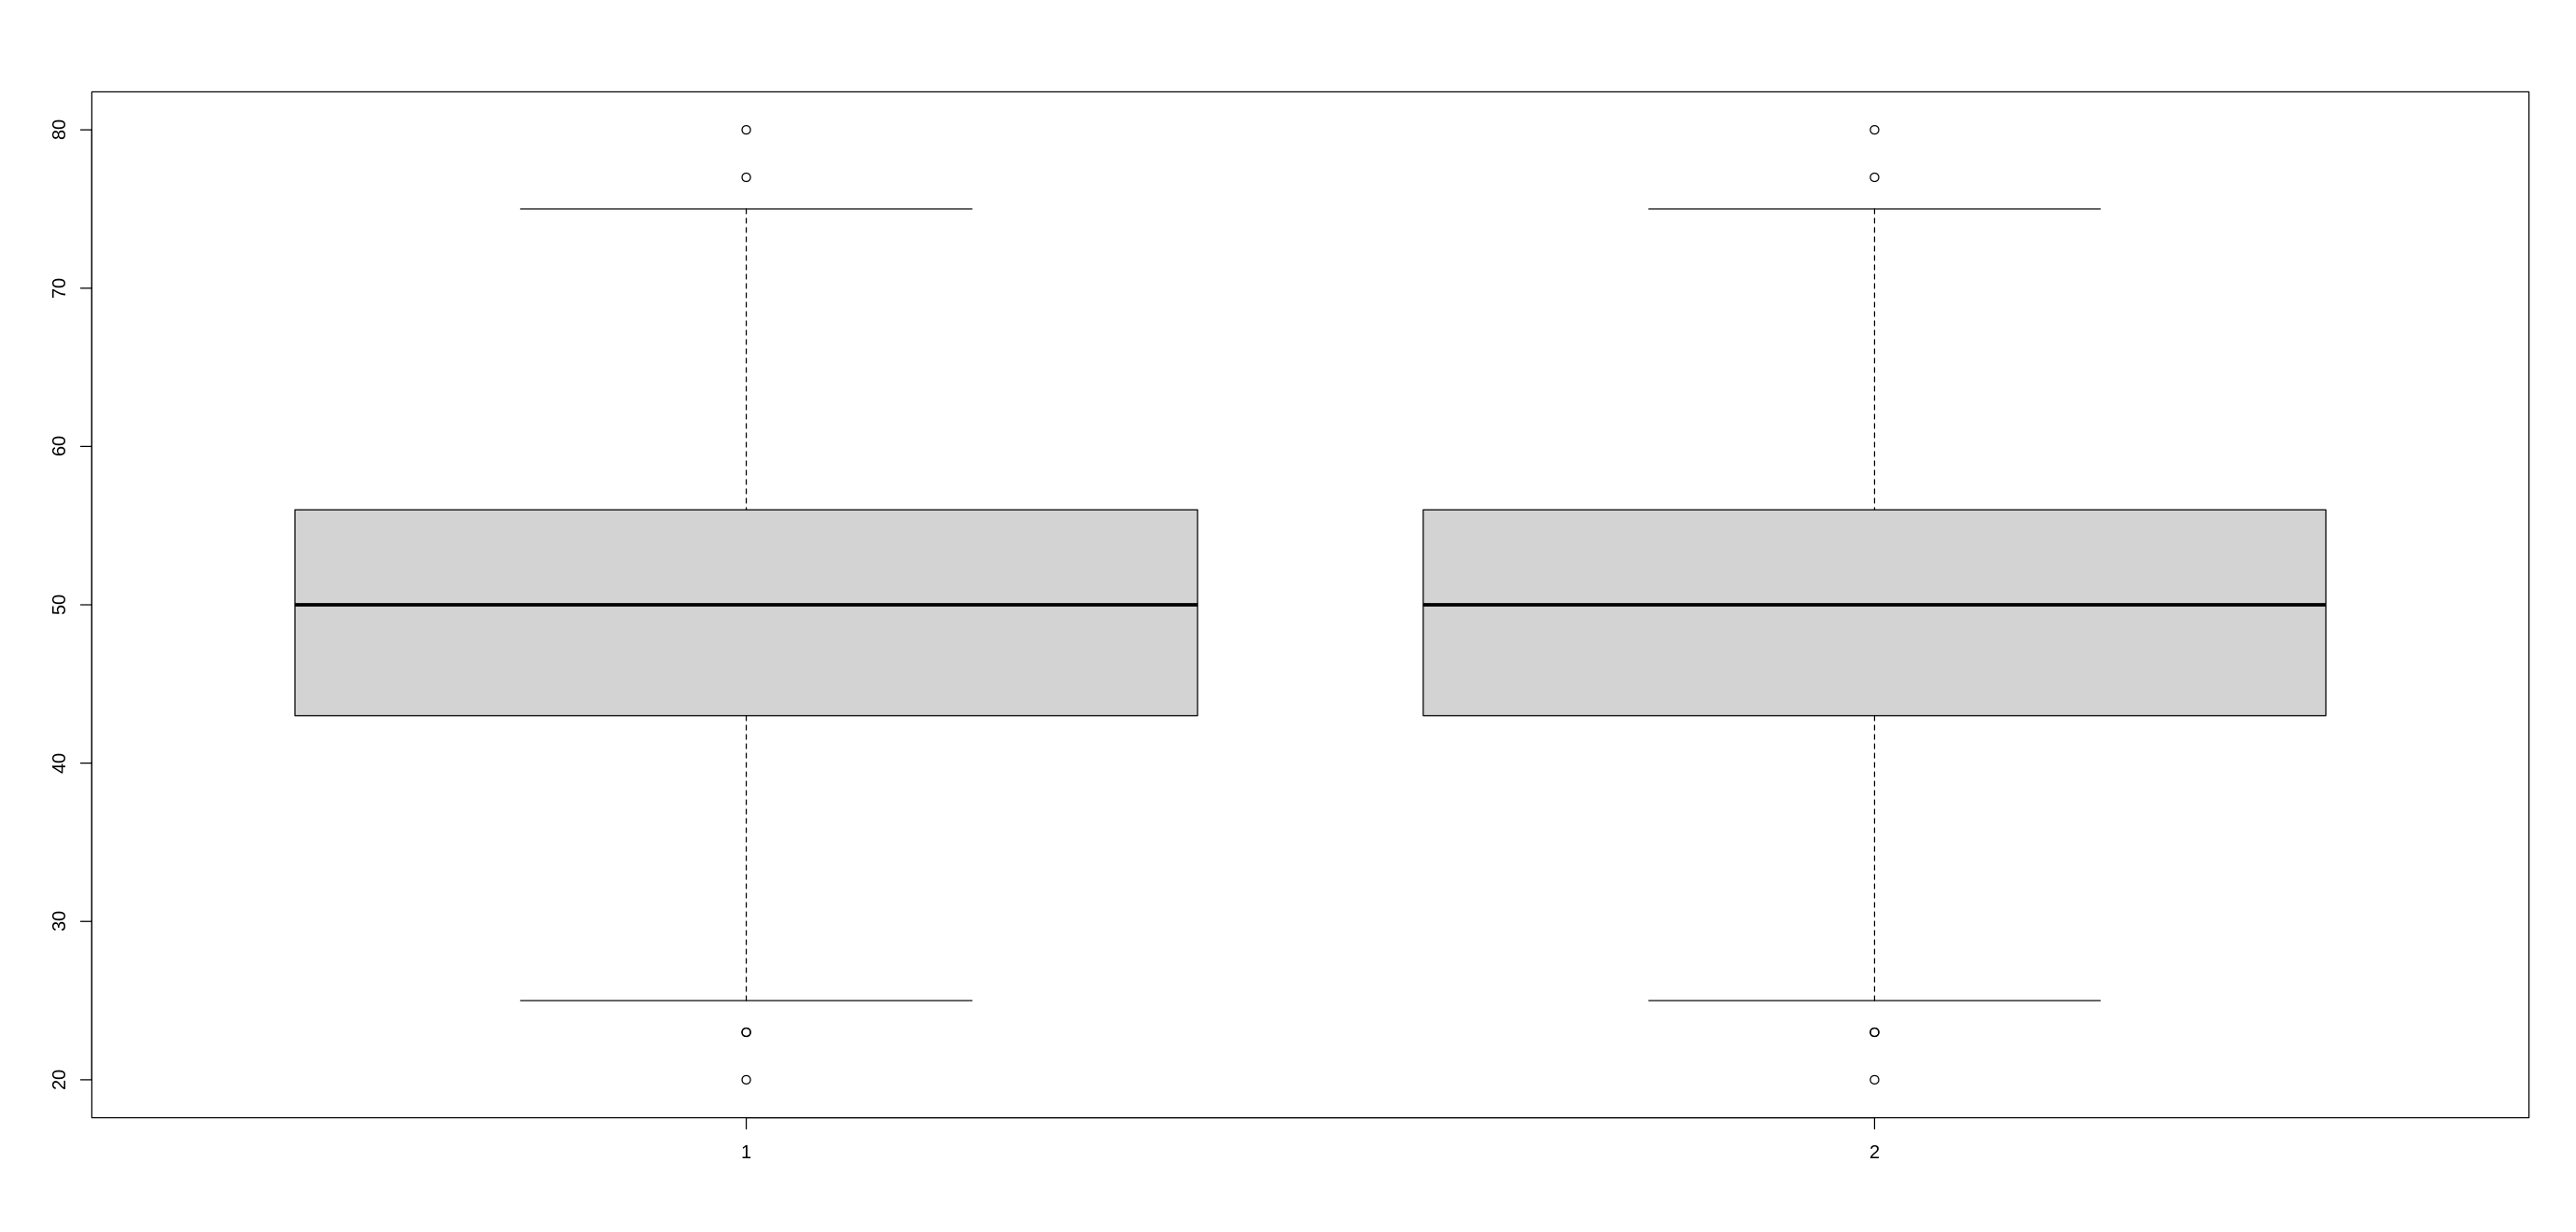

In [ ]:
boxplot(bp$age,bp$age)

In [ ]:
rosnerTest(bp$age)


Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            bp$age

Sample Size:                     500

Test Statistics:                 R.1 = 3.115579
                                 R.2 = 3.071002
                                 R.3 = 2.856734

Test Statistic Parameter:        k = 3

Alternative Hypothesis:          Up to 3 observations are not
                                 from the same Distribution.

Type I Error:                    5%

Number of Outliers Detected:     0

  i   Mean.i     SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 49.68200 9.731098    80     459 3.115579   3.863127   FALSE
2 1 49.62124 9.645464    20      59 3.071002   3.862597   FALSE
3 2 49.68072 9.563116    77     118 2.856734   3.862066   FALSE



In [ ]:
rosnerTest(bp$sbp)


Results of Outlier Test
-------------------------

Test Method:                     Rosner's Test for Outliers

Hypothesized Distribution:       Normal

Data:                            bp$sbp

Sample Size:                     500

Test Statistics:                 R.1 = 3.261243
                                 R.2 = 3.099718
                                 R.3 = 3.133257

Test Statistic Parameter:        k = 3

Alternative Hypothesis:          Up to 3 observations are not
                                 from the same Distribution.

Type I Error:                    5%

Number of Outliers Detected:     0

  i   Mean.i     SD.i Value Obs.Num    R.i+1 lambda.i+1 Outlier
1 0 144.4740 5.680657   163     287 3.261243   3.863127   FALSE
2 1 144.4369 5.625309   127      18 3.099718   3.862597   FALSE
3 2 144.4719 5.576270   127      59 3.133257   3.862066   FALSE



*No outlier.*

**Pearson correlation test**

In [ ]:
cor.test(bp$age,bp$sbp,method = c("pearson"))


	Pearson's product-moment correlation

data:  bp$age and bp$sbp
t = 37.087, df = 498, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8316397 0.8785241
sample estimates:
      cor 
0.8568433 


**Interpretation**

Higher age is strongly related to higher systolic blood pressure, and this relationship is unlikely to be due to random chance (P < 0.05).

or

Age is statistically significantly correlated with systolic blood pressure.

*   note: If |R| < 0.2, running a regression analysis probably won't give you useful
information.



**Do regression analysis**

In [ ]:
sbp_model <- lm(sbp ~ age, data=bp)

In [ ]:
summary(sbp_model)


Call:
lm(formula = sbp ~ age, data = bp)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1329 -2.1309 -0.1325  1.8676  7.8679 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 119.62338    0.68277  175.20   <2e-16 ***
age           0.50019    0.01349   37.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.932 on 498 degrees of freedom
Multiple R-squared:  0.7342,	Adjusted R-squared:  0.7336 
F-statistic:  1375 on 1 and 498 DF,  p-value: < 2.2e-16


**Interpret**

The regression model shows association between systolic blood pressure (sbp) and age, based on a given dataset (bp). The equation of the linear regression model is:

sbp=119.62+0.5×age

Both the intercept (119.62) and the coefficient for age (0.5) are statistically significant, as indicated by their p-values (< 0.001). The model explains approximately 73.4% of the variance in systolic blood pressure, as shown by the Multiple R-squared value (0.734).

# **Regression diagnostics !!!**

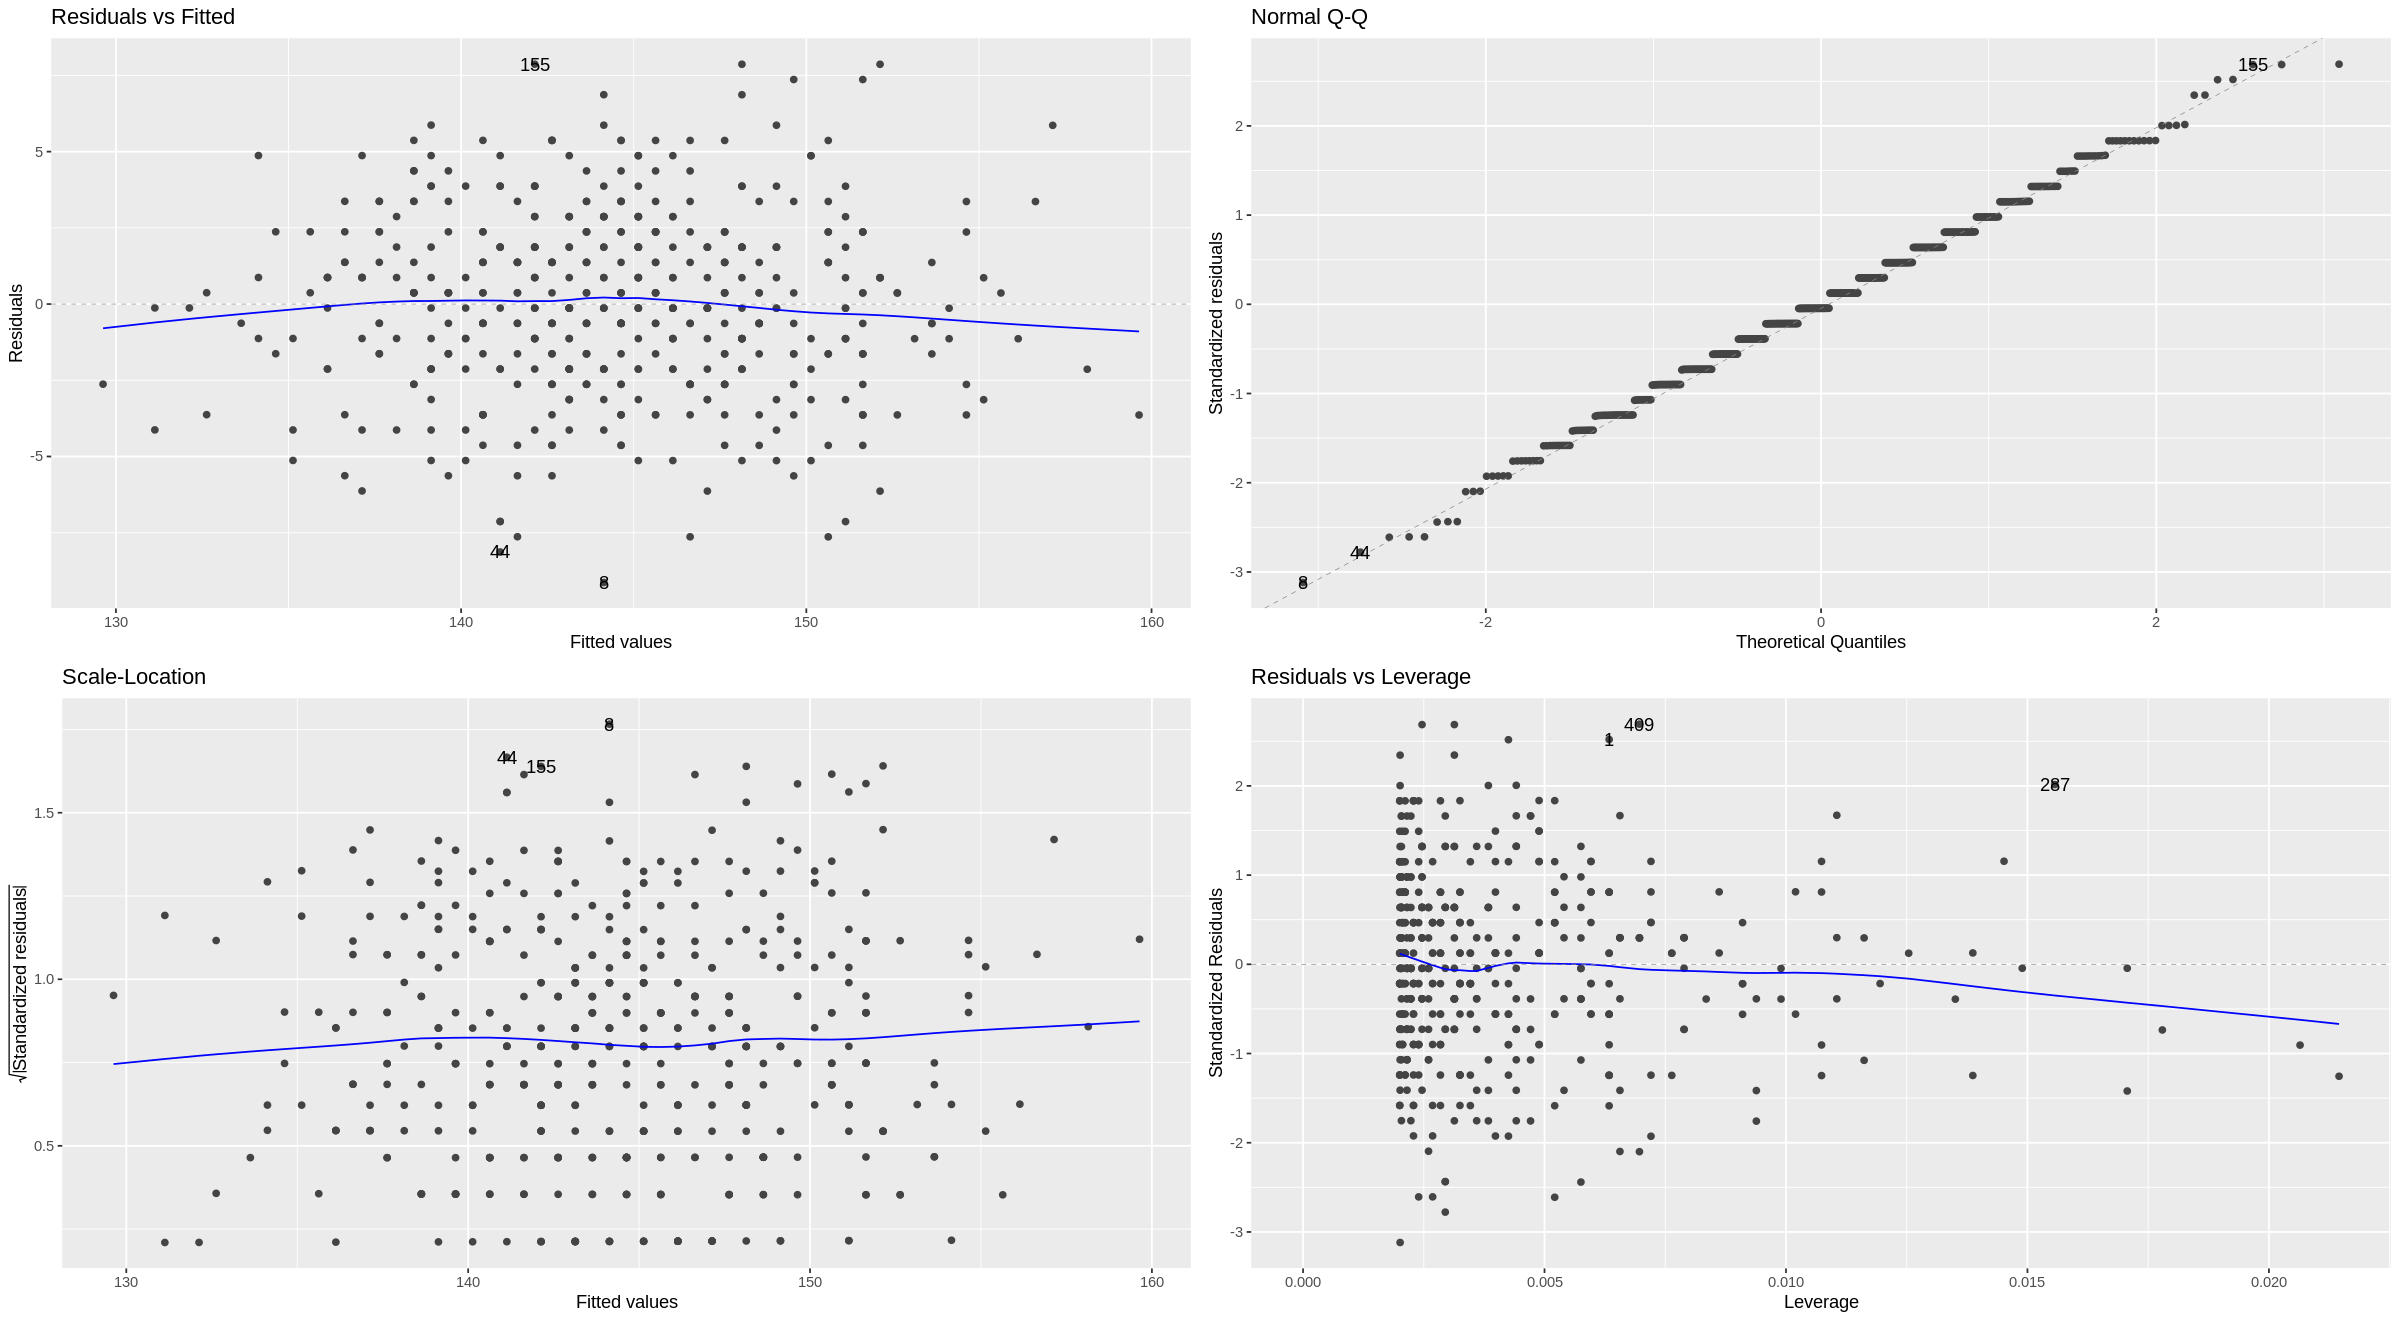

In [ ]:
options(repr.plot.width=20, repr.plot.height=11)
autoplot(sbp_model)

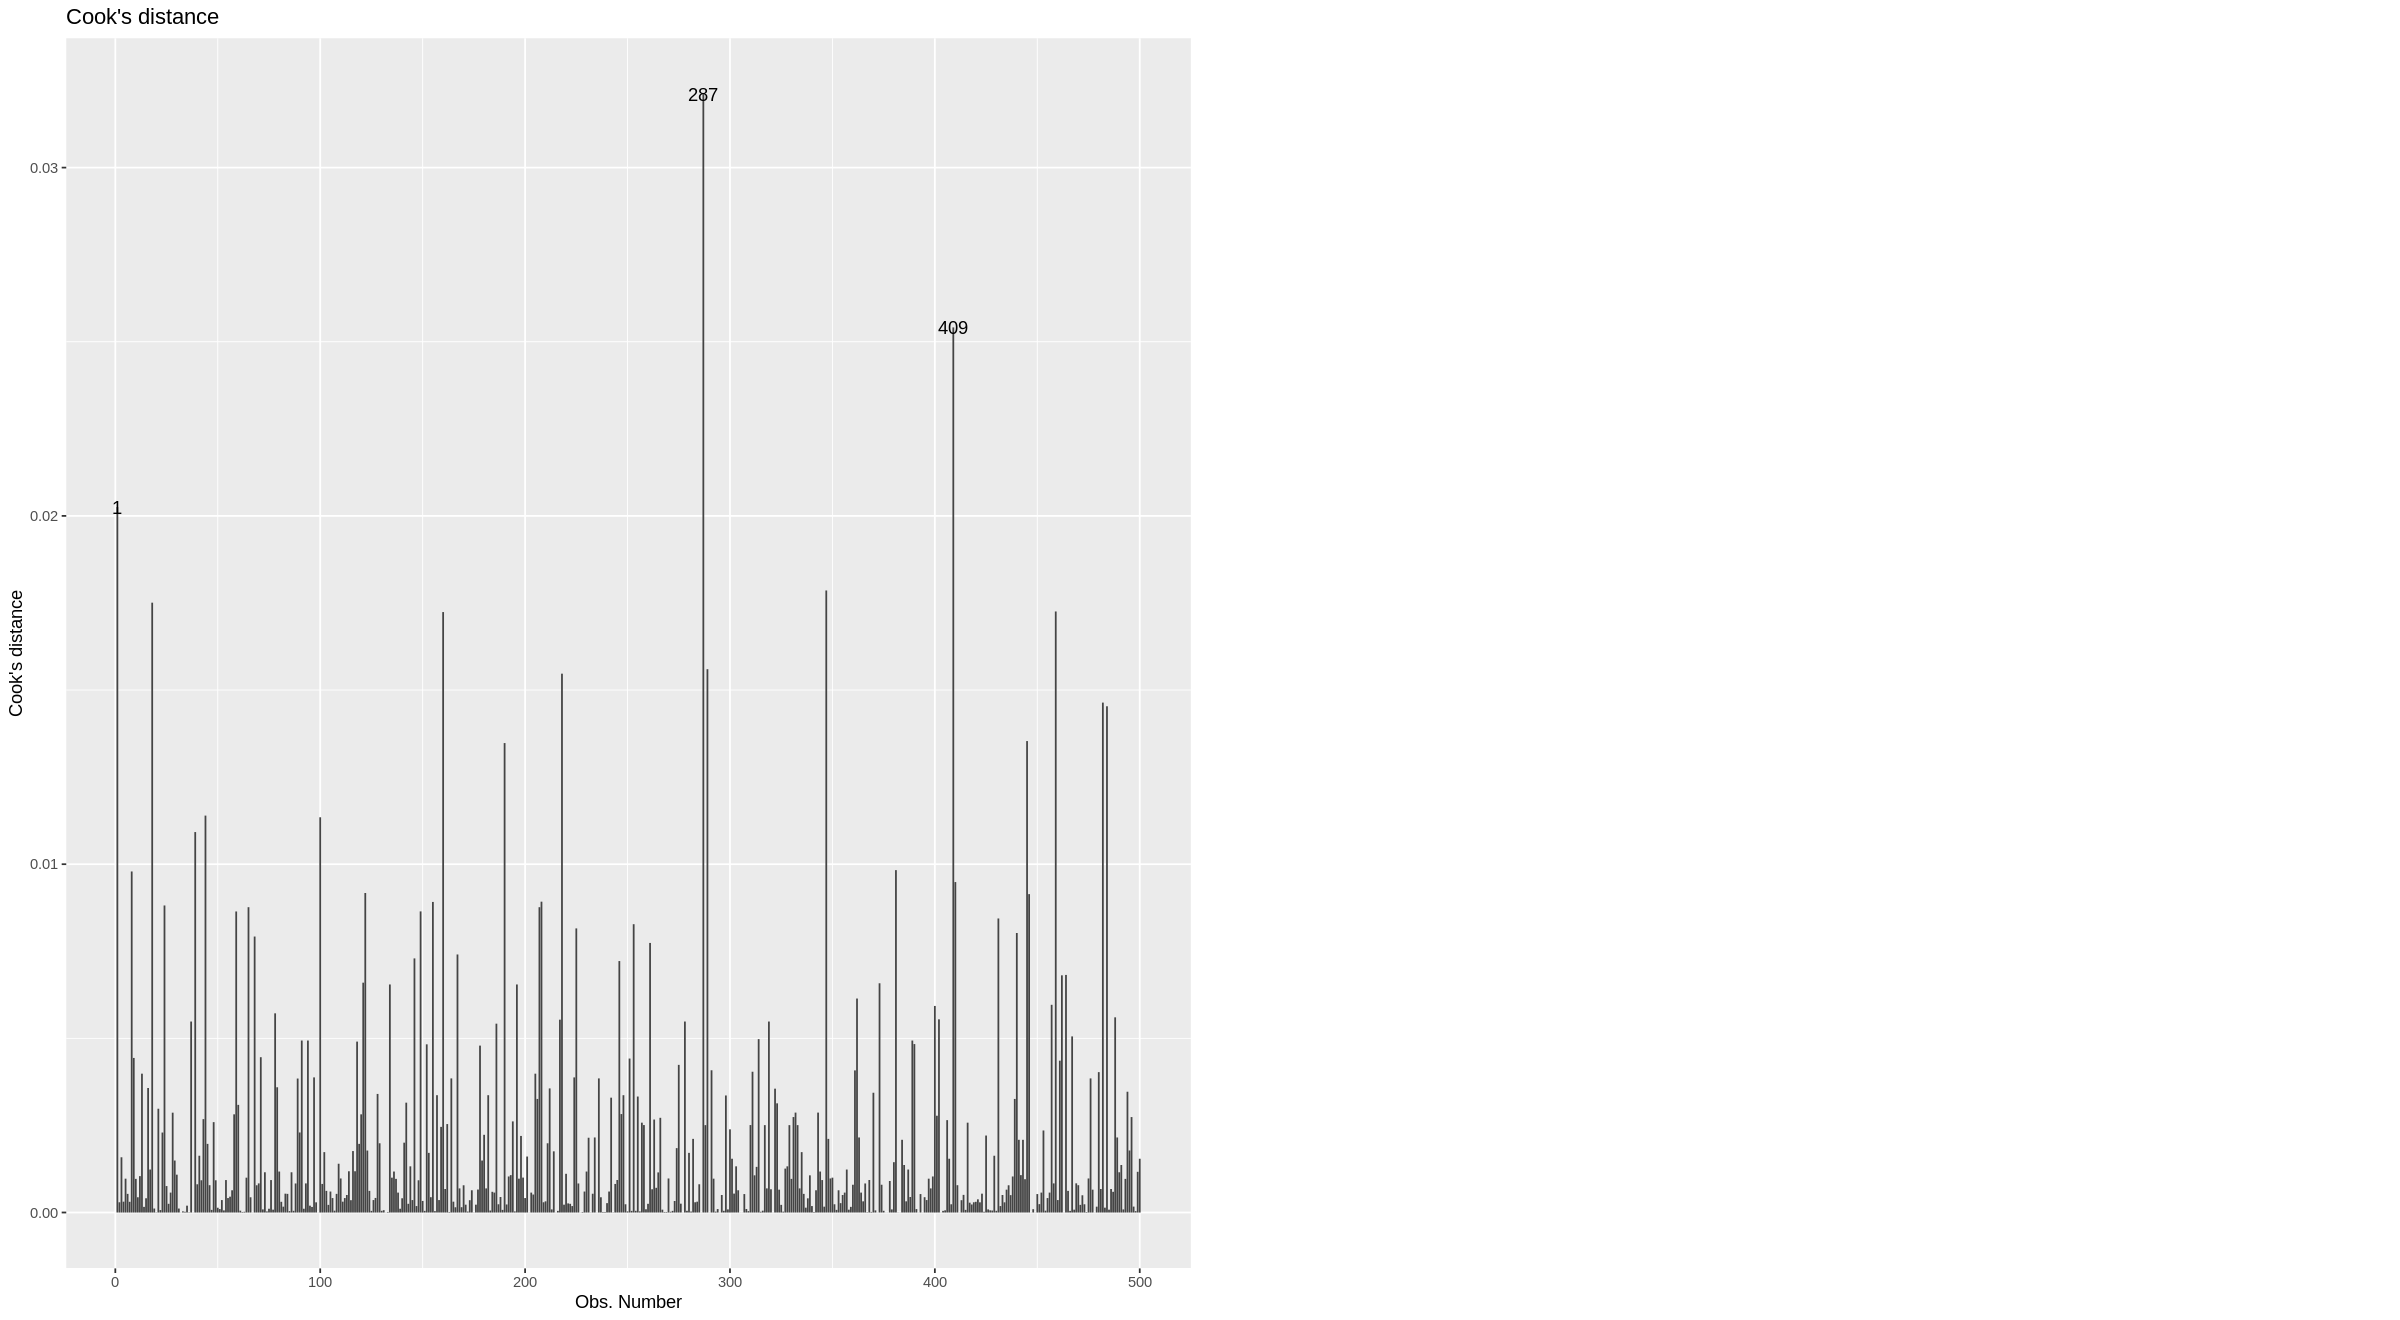

In [ ]:
autoplot(sbp_model,which=4)

In [ ]:
cook_values <- cooks.distance(sbp_model)
n <- length(cook_values)  # Number of observations
k <- length(coef(sbp_model)) - 1  # Number of predictors
threshold <- 4 / (n - k - 1)

# Identify influential observations
influential_obs <- which(cook_values > threshold)

In [ ]:
bp[unique(influential_obs),]

,age,sbp
,<dbl>,<dbl>
1,64,159
8,49,135
18,23,127
24,62,156
39,26,129
44,43,133
59,20,127
65,43,134
100,57,156


# **What to Do Next?**

Run your model with and without the influential observations and compare the results. Do the coefficients change dramatically? Does the fit of the model improve?

In [ ]:
bp2<-bp[-unique(influential_obs),]

In [ ]:
glimpse(bp2)

Rows: 469
Columns: 2
$ age <dbl> 44, 54, 56, 54, 49, 65, 70, 49, 63, 73, 36, 47, 49, 56, 47, 26, 63…
$ sbp <dbl> 143, 150, 149, 144, 142, 153, 152, 147, 150, 155, 141, 142, 146, 1…


In [ ]:
sbp_model2 <- lm(sbp ~ age, data=bp2)

In [ ]:
summary(sbp_model2)


Call:
lm(formula = sbp ~ age, data = bp2)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0943 -1.7893 -0.0943  1.8348  6.7994 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 120.56913    0.65502  184.07   <2e-16 ***
age           0.48228    0.01296   37.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.555 on 467 degrees of freedom
Multiple R-squared:  0.748,	Adjusted R-squared:  0.7474 
F-statistic:  1386 on 1 and 467 DF,  p-value: < 2.2e-16


**The results**

Equation: The estimated regression equation is

sbp=120.56+0.48×age

Coefficients: 0.48

Intercept: 120.56

Significant: P value < 0.001

**Previous results**

Equation: The estimated regression equation is

sbp=119.62+0.5×age

Coefficients: 0.50

Intercept: 119.62

Significant: P value < 0.001

# The model does not change too much, so keep them all.